<a href="https://colab.research.google.com/github/DevDave96/AI-ML-Machine-Learning/blob/main/SMART_CROP_RECOMMENDATION_ENGINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***SMART CROP RECOMMENDATION ENGINE***

## ***IMPORTING THE LIBRARIES***

In [3]:
import pandas as pd    # For handling the spreadsheet
import numpy as np      # For math operations
import tensorflow as tf     # The main AI engine
from tensorflow.keras.models import Sequential     # To build the layers in order
from tensorflow.keras.layers import Dense, Dropout     # The "neurons" of the brain
from sklearn.model_selection import train_test_split      # To split data for practice/testing
from sklearn.preprocessing import StandardScaler, LabelEncoder     # To resize numbers for the AI
import joblib      # To save our work later

In [7]:
# This checks if TensorFlow is actually ready
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.19.0


In [8]:
print("Ready to Build!!!")

Ready to Build!!!


# ***PHASE 1A: LOADING THE AGRICULTURE DATASET***

In [10]:
# Read the CSV file
df = pd.read_csv('Crop_recommendation.csv')

# Display the first 5 rows to verify data
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## ***B: DATA INSPECTION AND CLEANING***

In [12]:
# Check for missing values
print("Missing values in each columns:")
print(df.isnull().sum())

Missing values in each columns:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [16]:
print("\nList of crops in the dataset:")
print(df['label'].unique())


List of crops in the dataset:
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [17]:
# See the count of each crop
print("\ncount of each crop type:")
print(df['label'].value_counts())


count of each crop type:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


## ***C: Separating Features and Target Labels***

In [18]:
# X = All columns except 'label'
X = df.drop('label', axis=1)

# y = Only the 'label' column
y = df['label']

In [19]:
print("Features (X) and Target (y) have been separated.")

Features (X) and Target (y) have been separated.


## ***PHASE2A: ENCODING CATEGORICAL LABELS***

In [20]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Transform the 'label' column into numbers
y_encoded = label_encoder.fit_transform(y)

In [22]:
# Print the first 5 encoded values and their original names
print("Encoded labels (first 5):", y_encoded[:5])


Encoded labels (first 5): [20 20 20 20 20]


In [23]:
print("Original labels (first 5):", y[:5].values)

Original labels (first 5): ['rice' 'rice' 'rice' 'rice' 'rice']


## ***B: Splitting Data into Training and Testing Sets***

In [25]:
# Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [26]:
print(f"Training set size: {X_train.shape[0]} samples")

Training set size: 1760 samples


In [27]:
print(f"Training set size: {X_test.shape[0]} samples")

Training set size: 440 samples


## ***C: Feature Scaling***

In [31]:
# Initialize the Scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
print("Mean of scaled data:", np.round(X_train_scaled.mean(), 2))

Mean of scaled data: -0.0


In [35]:
print("Standard deviation of scaled data:", X_train_scaled.std())

Standard deviation of scaled data: 1.0


# ***Phase 3A: Defining the ANN Architecture***

In [41]:
# Initialize the "Brain"
model = Sequential([
    # Input Layer + First Hidden Layer
    # 'input_shape' must match the number of features (7: N, P, K, temp, hum, ph, rain)
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),

    # First Hidden Layer
    Dense(64, activation='relu'),
    Dropout(0.2),

    # Second Hidden Layer
    Dense(32, activation='relu'),

    # Output Layer
    Dense(22, activation='softmax')
])

# Compile the model
# We use 'adam' optimizer (the gold standard) and 'sparse_categorical_crossentropy'
# because our labels (y) are integers (0, 1, 2...).
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Show the summary of the brain we just built
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 22)             │           726 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,318 (12.96 KB)

 Trainable params: 3,318 (12.96 KB)

 Non-trainable params: 0 (0.00 B)

## ***B: Training the Neural Network***

In [42]:
print("Starting trianing... This should take about 30-60 seconds.")

# history captures all the training stats so we can look at them later
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,      # Number of full passes through the data
    batch_size=32,   # Number of samples per gradient update
    validation_split=0.2, # We set aside 20% of the training data to see how it learns
    verbose=1  # Shows the live progress bars
)

Starting trianing... This should take about 30-60 seconds.
Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0695 - loss: 3.0448 - val_accuracy: 0.1960 - val_loss: 2.7016
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2224 - loss: 2.6011 - val_accuracy: 0.4091 - val_loss: 2.2211
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4092 - loss: 2.1308 - val_accuracy: 0.5881 - val_loss: 1.6756
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6369 - loss: 1.5536 - val_accuracy: 0.7642 - val_loss: 1.1738
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7505 - loss: 1.1218 - val_accuracy: 0.8466 - val_loss: 0.8163
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8172 - loss: 0.8197 - val_accuracy: 0.8892 - val_loss: 0.6058
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8316 - loss: 0.6564 - val_accuracy: 0.9062 - val_loss: 0.4906
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accurac

In [43]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Final Test Accuracy: {test_acc * 100:.2f}%")

Final Test Accuracy: 96.14%


## ***C: Visualizing the Training History***

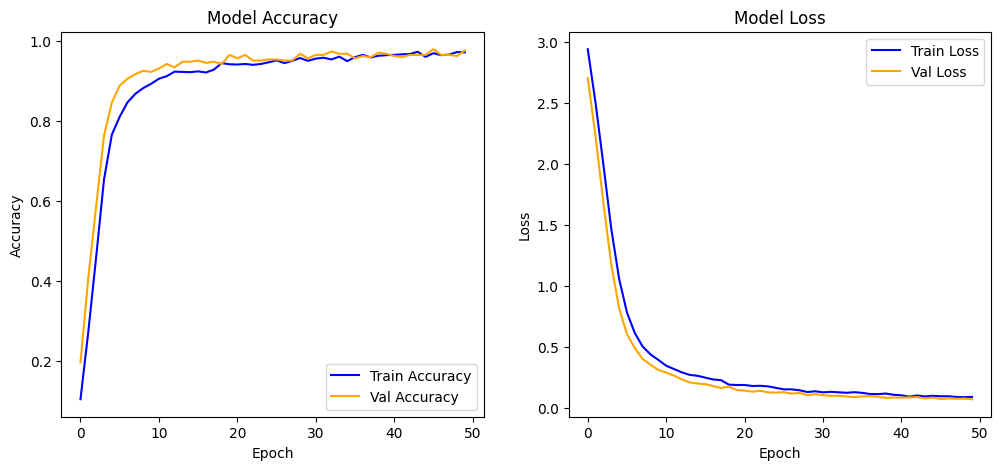

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))

# Plot Accuracy (How well it learns)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss (How many mistakes it makes)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# ***Saving the work***

In [46]:
#Save the Neural Network
model.save('crop_ann_model.keras')

#Save the Scaler (The "Resizer")
joblib.dump(scaler, 'crop_scaler.pkl')

#Save the Label Encoder (The "Translator")
joblib.dump(label_encoder, 'crop_label_encoder.pkl')

['crop_label_encoder.pkl']

## ***Lets test the model***

In [47]:
# Let's define some test data (N, P, K, temp, humidity, ph, rainfall)
# Example: High Nitrogen, High Rainfall (Should be Rice)
test_input = [[90, 42, 43, 20.8, 82.0, 6.5, 202.9]]

# 1. Scale the input
test_input_scaled = scaler.transform(test_input)

# 2. Predict
prediction = model.predict(test_input_scaled)

# 3. Get the result
predicted_index = np.argmax(prediction)
predicted_crop = label_encoder.inverse_transform([predicted_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [48]:
print(f"\nAI Result: The model recommends planting {predicted_crop[0].upper()}")


AI Result: The model recommends planting RICE


In [49]:
print(f"Confidence: {np.max(prediction) * 100:.2f}%")

Confidence: 77.59%
